In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file

# Loading the dataset using load_svmlight_file from sklearn
file_path = 'diabetes_scale.txt'
data = load_svmlight_file(file_path, n_features=8)

features_sparse, labels = data
features = features_sparse.toarray()

# Create a DataFrame for features ans labels
df_features = pd.DataFrame(features, columns=[f'feature_{i+1}' for i in range(features.shape[1])])
df_labels = pd.Series(labels, name='label')

# Concatenate the labels and features into a single DataFrame
df = pd.concat([df_labels, df_features], axis=1)

df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,-1.0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1.0,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1.0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1.0,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1.0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('label', axis=1)  # Features
y = df['label']               # Labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting Perceptron model
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)


Classification Report
              precision    recall  f1-score     support
-1.0           0.733333  0.550000  0.628571   80.000000
1.0            0.789474  0.894040  0.838509  151.000000
accuracy       0.774892  0.774892  0.774892    0.774892
macro avg      0.761404  0.722020  0.733540  231.000000
weighted avg   0.770031  0.774892  0.765804  231.000000


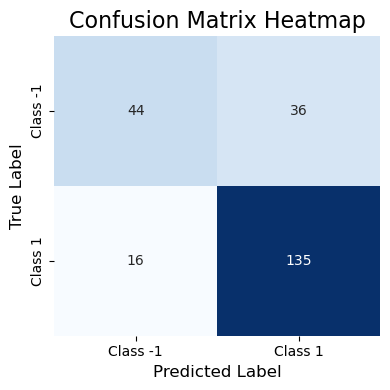

In [12]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

# Classification Report
print("Classification Report")
print(report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class -1', 'Class 1'], yticklabels=['Class -1', 'Class 1'])
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust the layout to fit labels and titles properly
plt.show()

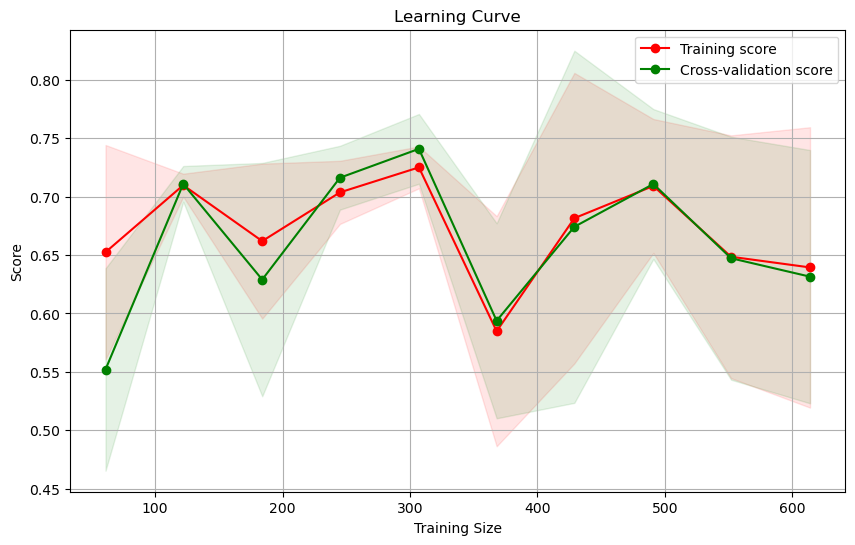

In [7]:
# Step 4: Generate Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    Perceptron(max_iter=1000, tol=1e-3), X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Mean and standard deviation for train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot Learning Curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

# Plotting the standard deviation for both train and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()